# Import data

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [2]:
data = LoadData(15)

In [3]:
df = data.load_data()
df = shuffle(df)
print(df.shape)
df.head()

no image
(224, 4)


,blue,green,red,label
64,1,225,220,4
117,145,57,43,12
32,17,198,248,2
136,0,198,250,2
122,0,239,246,3


## Prepare data 

In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from keras.utils import np_utils
X = np.array(df.drop(['label'],axis=1))
X = scale(X)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_val = np_utils.to_categorical(y_test)
dummy_y = np_utils.to_categorical(y_train)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

c:\users\asus\appdata\local\programs\python\python3.6.5\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# Create model

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [53]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(3,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(15, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fit model

In [67]:
# I used 100 epoches
history = model.fit(X_train, dummy_y, epochs=4,verbose=1, batch_size=5,validation_data=(X_test,y_val))

Train on 168 samples, validate on 56 samples
Epoch 1/4
168/168 [==============================] - 0s 3ms/step - loss: 0.3627 - acc: 0.8690 - val_loss: 0.5601 - val_acc: 0.8393
Epoch 2/4
168/168 [==============================] - 0s 1ms/step - loss: 0.3591 - acc: 0.8810 - val_loss: 0.5518 - val_acc: 0.8393
Epoch 3/4
168/168 [==============================] - 0s 1ms/step - loss: 0.4172 - acc: 0.8631 - val_loss: 0.5466 - val_acc: 0.8393
Epoch 4/4
168/168 [==============================] - 0s 1ms/step - loss: 0.3936 - acc: 0.8750 - val_loss: 0.5695 - val_acc: 0.8393


In [63]:
pred = model.predict(X_test)
# for i in range(len(pred)):
#     print(np.max(pred[i]))
y_pred = pred.argmax(axis=1)
for i in range(len(y_pred)):
    print('True : {} Pred : {}'.format(y_test[i],y_pred[i]))

True : 5 Pred : 5
True : 0 Pred : 0
True : 4 Pred : 4
True : 3 Pred : 2
True : 10 Pred : 10
True : 7 Pred : 6
True : 13 Pred : 14
True : 7 Pred : 7
True : 14 Pred : 14
True : 0 Pred : 0
True : 13 Pred : 13
True : 8 Pred : 8
True : 11 Pred : 11
True : 6 Pred : 5
True : 8 Pred : 8
True : 4 Pred : 5
True : 7 Pred : 7
True : 14 Pred : 14
True : 14 Pred : 14
True : 7 Pred : 6
True : 11 Pred : 11
True : 6 Pred : 6
True : 14 Pred : 14
True : 13 Pred : 13
True : 2 Pred : 2
True : 9 Pred : 9
True : 11 Pred : 11
True : 10 Pred : 10
True : 9 Pred : 9
True : 9 Pred : 9
True : 5 Pred : 5
True : 1 Pred : 1
True : 12 Pred : 13
True : 1 Pred : 1
True : 12 Pred : 12
True : 0 Pred : 0
True : 3 Pred : 3
True : 4 Pred : 4
True : 5 Pred : 5
True : 13 Pred : 13
True : 11 Pred : 11
True : 7 Pred : 7
True : 4 Pred : 4
True : 9 Pred : 10
True : 1 Pred : 1
True : 3 Pred : 3
True : 0 Pred : 0
True : 8 Pred : 8
True : 7 Pred : 7
True : 5 Pred : 4
True : 10 Pred : 10
True : 7 Pred : 7
True : 3 Pred : 3
True : 6 Pr

In [10]:
# model.save('nn-model.h5')

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8392857142857143

## Plot loss and accuracy score

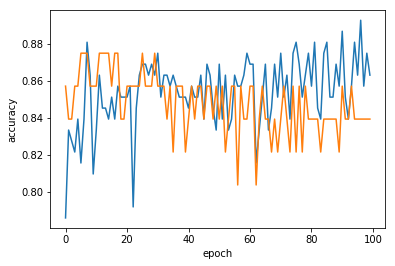

In [65]:
import matplotlib.pyplot as plt
# score 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

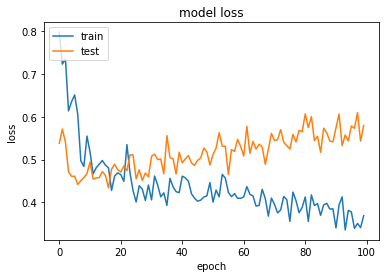

In [66]:
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()